<a href="https://colab.research.google.com/github/JaperTai77/Colab-notebook/blob/main/Gaza_conflict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

In [2]:
url1 = 'https://raw.githubusercontent.com/JaperTai77/data-modified/main/House%20Demolitions%20in%20Palestine.csv'
url2 = 'https://raw.githubusercontent.com/JaperTai77/data-modified/main/Palestine%20Body%20Count.csv'

df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

In [3]:
df1.head().style.set_properties(**{'background-color':'black','color':'white'})

,Year,Housing Units,People Left Homeless,Minors Left Homeless,Area,Type of Structure,Demolish Scope,District,Demolition Reason,Demolition carried out by
0,2021.000000,8,31,14,The West Bank (Excluding East Jerusalem),Residential Structure,nan,Al-Quds,Demolition on the pretext of unlawful construction,nan
1,2021.000000,3,5,1,The West Bank (Excluding East Jerusalem),Residential Structure,nan,Bethlehem,Demolition on the pretext of unlawful construction,nan
2,2021.000000,7,18,12,The West Bank (Excluding East Jerusalem),Residential Structure,nan,Hebron,Demolition on the pretext of unlawful construction,nan
3,2021.000000,1,0,0,The West Bank (Excluding East Jerusalem),Residential Structure,nan,Jenin,Demolition on the pretext of unlawful construction,nan
4,2021.000000,16,78,33,The West Bank (Excluding East Jerusalem),Residential Structure,nan,Jericho,Demolition on the pretext of unlawful construction,nan


In [4]:
df2.head().style.set_properties(**{'background-color':'black','color':'white'})

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000.000000,DECEMBER,781,nan,51,8
1,2000.000000,NOVEMBER,3838,nan,112,22
2,2000.000000,OCTOBER,5984,nan,104,10
3,2000.000000,SEPTEMBER,nan,nan,16,1
4,2001.000000,DECEMBER,304,nan,67,36


## Null value

Year                           3
Housing Units                  2
People Left Homeless           2
Minors Left Homeless           3
Area                           3
Type of Structure              3
Demolish Scope               175
District                       3
Demolition Reason              3
Demolition carried out by    220
dtype: int64


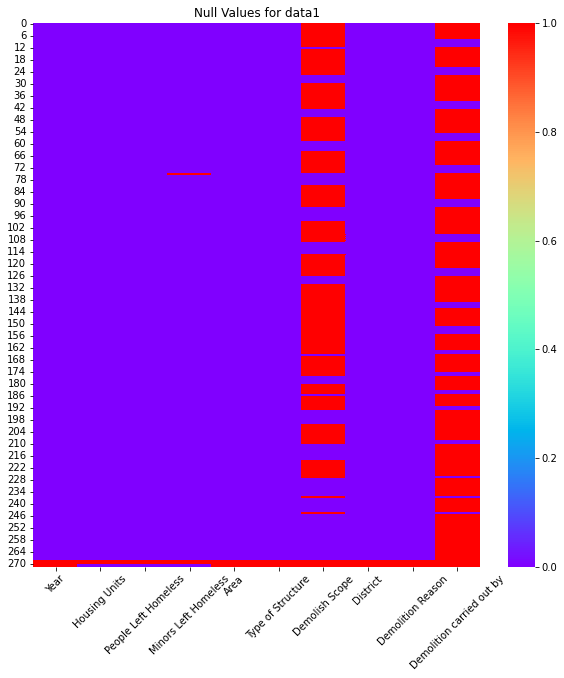

In [7]:
print(df1.isnull().sum())
plt.figure(figsize = (10,10))
sns.heatmap(df1.isnull(),cmap = 'rainbow')
plt.title('Null Values for data1')
plt.xticks(rotation = 45)
plt.show()

Year                       2
Month                      2
Palestinians Injuries     55
Israelis Injuries        118
Palestinians Killed        1
Israelis Killed            1
dtype: int64


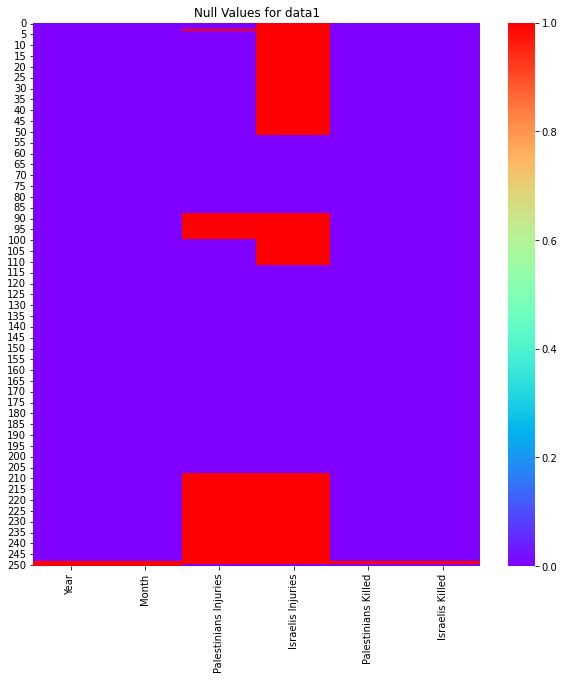

In [8]:
print(df2.isnull().sum())
plt.figure(figsize = (10,10))
sns.heatmap(df2.isnull(),cmap = 'rainbow')
plt.title('Null Values for data1')
plt.show()

In [9]:
df1.tail(3).style.set_properties(**{'background-color':'red','color':'white'})

,Year,Housing Units,People Left Homeless,Minors Left Homeless,Area,Type of Structure,Demolish Scope,District,Demolition Reason,Demolition carried out by
269,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
270,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
271,nan,"5,498","25,730","5,998",nan,nan,nan,nan,nan,nan


In [10]:
df2.tail(3).style.set_properties(**{'background-color':'red','color':'white'})

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
248,2021.000000,MAY,nan,nan,26,3
249,nan,nan,nan,nan,nan,nan
250,nan,nan,"111,475","5,160","10,000","1,275"


## Modify data1

In [11]:
df1['People Left Homeless']=df1['People Left Homeless'].str.replace(',', '')
df1['People Left Homeless'] = df1['People Left Homeless'].astype(float)

In [13]:
df1.fillna(value=0,inplace=True)

In [12]:
df1=df1.iloc[0:270]

In [14]:
df1["Year"]=df1["Year"].apply(int)
df1["Housing Units"]=df1["Housing Units"].apply(int)
df1["Minors Left Homeless"] = df1["Minors Left Homeless"].apply(int)

## Modify data2

In [15]:
# replace the rows that have bad names or values
df2=df2.iloc[0:249]
df2['Palestinians Injuries']=df2['Palestinians Injuries'].replace("(incl. Jun)", np.nan)
df2['Israelis Injuries']=df2['Israelis Injuries'].replace("(incl. Jun)", np.nan)
df2['Palestinians Injuries']=df2['Palestinians Injuries'].replace("(incl. Aug)", np.nan)
df2['Israelis Injuries']=df2['Israelis Injuries'].replace("(incl. Aug)", np.nan)
df2 = df2.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [16]:
df2["Year"]=df2["Year"].astype(int)
df2["Palestinians Killed"]=df2["Palestinians Killed"].astype(int)
df2["Israelis Killed"]=df2["Israelis Killed"].astype(int)
df2["Israelis Injuries"] = df2["Israelis Injuries"].astype(int)
df2["Palestinians Injuries"] = df2["Palestinians Injuries"].astype(int)

## Visualization

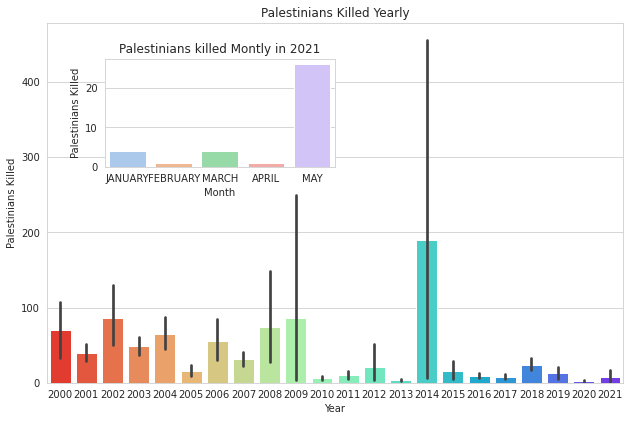

In [26]:
sns.set_style('whitegrid')
sns.set_palette('pastel')

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.1,0.6,0.4,0.3])
ax1.set_title('Palestinians Killed Yearly')
ax2.set_title('Palestinians killed Montly in 2021')
sns.barplot(x='Year', y='Palestinians Killed', data=df2, palette='rainbow_r',ax = ax1);
sns.barplot(x='Month', y='Palestinians Killed', data=df2[df2['Year']==2021], ax = ax2);

In [ ]:
fig = px.bar(df2, 
             x='Year', y='Palestinians Killed',
             title='Palestinians Killed Yearly', text='Month')
fig.show()

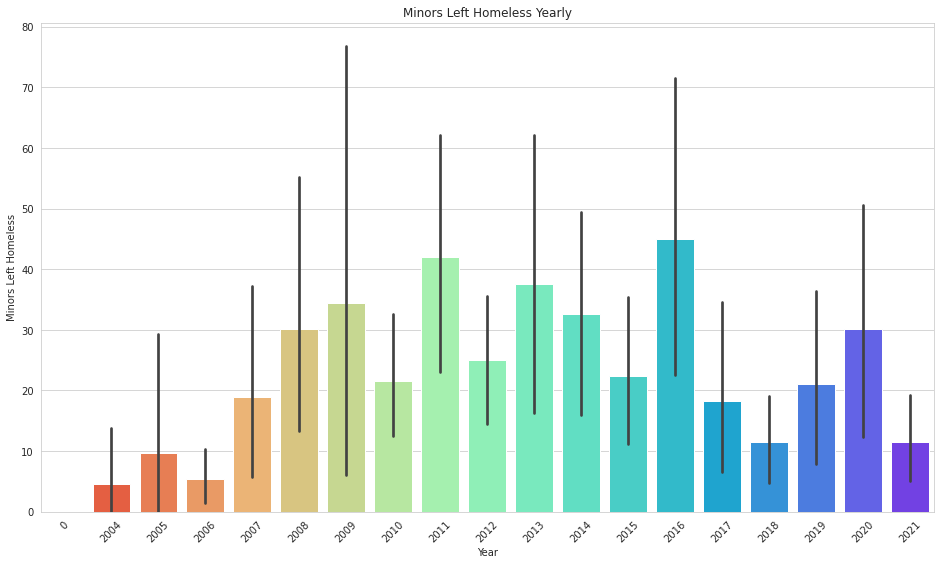

In [ ]:
plt.figure(figsize=(16,9))
plt.title('Minors Left Homeless Yearly')
plt.xticks(rotation=45)
sns.barplot(x='Year', y='Minors Left Homeless', data=df1, palette='rainbow_r')

In [ ]:
fig = px.bar(df1[df1['Year']>2000], x='Year', y='Minors Left Homeless',title='Minors Left Homeless Yearly', text='Housing Units')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Palestinians Killed Distribution')

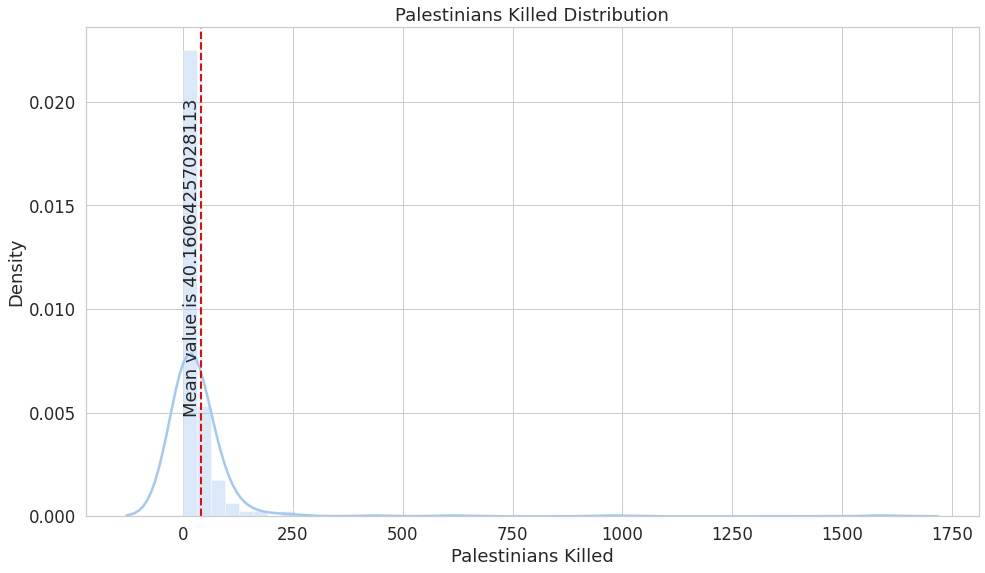

In [ ]:
mean_val = df2['Palestinians Killed'].values.mean()
plt.figure(figsize = (16,9))
sns.distplot(df2['Palestinians Killed'])
plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
plt.text(mean_val, 0.005, 'Mean value is '+str(mean_val), ha = 'right', rotation = 'vertical')
plt.title('Palestinians Killed Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Minors Left Homeless Distribution')

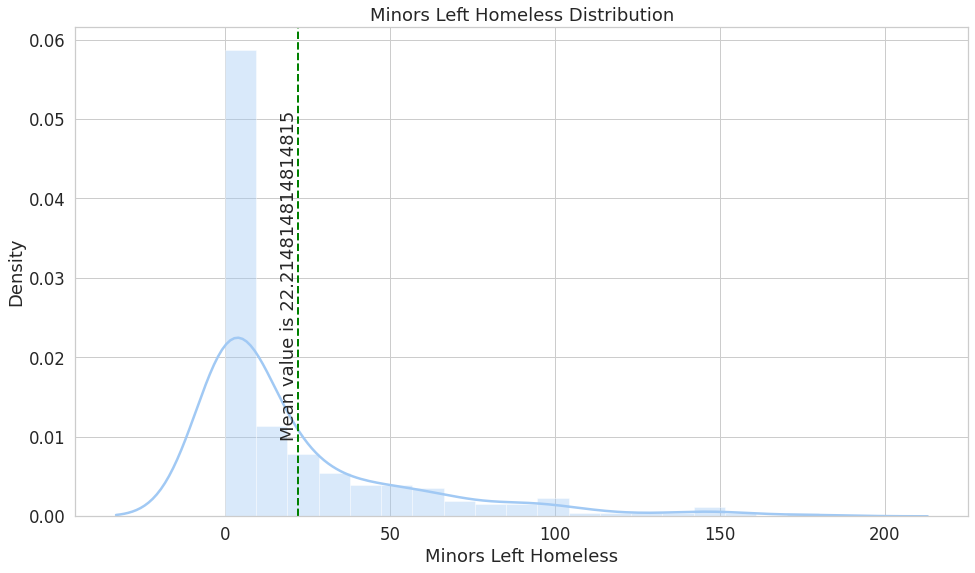

In [ ]:
mean_val = df1['Minors Left Homeless'].values.mean()
plt.figure(figsize = (16,9))
sns.distplot(df1['Minors Left Homeless'])
plt.axvline(mean_val, color='green', linestyle='dashed', linewidth=2)
plt.text(mean_val, 0.01, 'Mean value is '+str(mean_val), ha = 'right', rotation = 'vertical')
plt.title('Minors Left Homeless Distribution')

In [ ]:
fig = px.scatter_matrix(df2, dimensions=['Palestinians Injuries','Israelis Injuries','Palestinians Killed', 'Israelis Killed'], color="Month")
fig.show()

In [33]:
homeless_year = df1.groupby('Year').agg({'People Left Homeless':['sum','mean']})

In [40]:
homeless_year = homeless_year.drop(0,axis = 0)

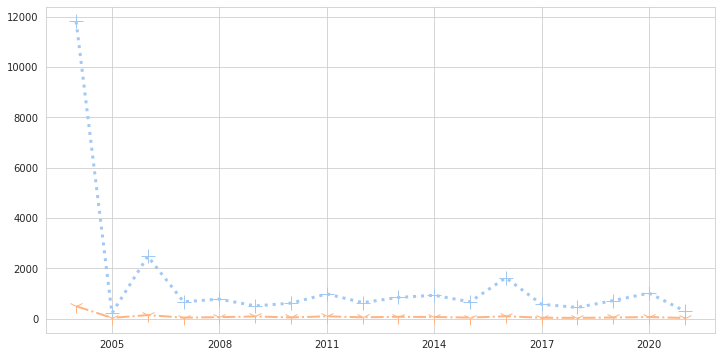

In [57]:
fig, ax = plt.subplots(1,1,figsize = (12,6))
ax.plot(homeless_year.index, homeless_year['People Left Homeless']['sum'], linestyle = ':', lw = 3, marker = '+', markersize = 14)
ax.plot(homeless_year.index, homeless_year['People Left Homeless']['mean'], linestyle = '-.', lw = 2, marker = '1', markersize = 14)

ax.set_xticks([2005,2008,2011,2014,2017,2020])
ax.set_xticklabels([2005,2008,2011,2014,2017,2020])
plt.show()

In [52]:
ing_year = df2.replace('n/a',0).groupby('Year').agg({'Palestinians Injuries':['sum'],'Israelis Injuries':['sum']})

In [55]:
ing_year['sum'] = ing_year['Palestinians Injuries']+ing_year['Israelis Injuries']

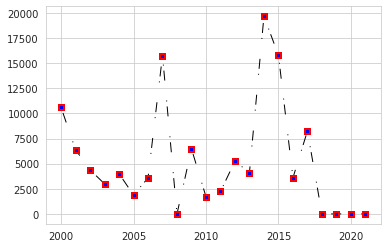

In [72]:
fig,ax = plt.subplots(1,1)
ax.xaxis.labelpad = 5
ax.yaxis.labelpad = 5

line = ax.plot(ing_year.index, ing_year['sum'], color="black", lw=1, marker='s', markersize=5, 
               markerfacecolor="blue", markeredgewidth=2, markeredgecolor="red");
line[0].set_dashes([1,5,10,20]) # line length, space length
plt.show()

In [79]:
homeless_dis = df1.groupby('District').agg({'People Left Homeless':['sum']}).drop(0,axis = 0)

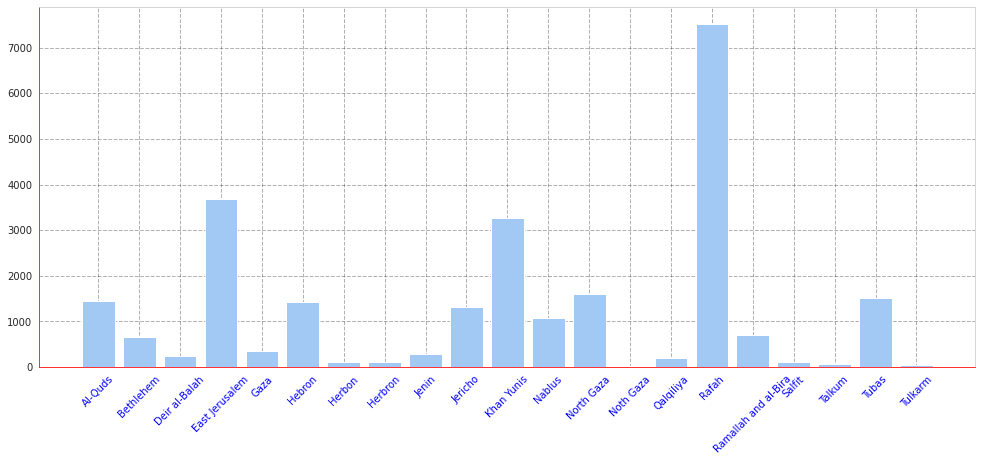

In [101]:
fig = plt.figure(figsize = (13,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(homeless_dis.index, homeless_dis['People Left Homeless']['sum'])

ax.grid(color='black', alpha=0.3, linestyle='dashed', linewidth=1)

ax.spines['bottom'].set_color('red')
ax.spines['left'].set_color('red')

ax.set_xticklabels(homeless_dis.index,rotation = 45)

for label in ax.get_xticklabels():
     label.set_color("blue")

plt.show()

In [103]:
killedP = df2.groupby('Year').agg({'Palestinians Killed':['sum']})

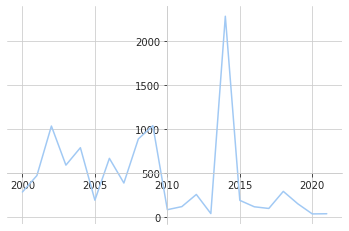

In [127]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',500))

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',2010))


ax.plot(killedP.index, killedP['Palestinians Killed']['sum']);

In [138]:
ing_year = df2.replace('n/a',0).groupby('Year').agg({'Palestinians Injuries':['sum'],'Israelis Injuries':['sum']})

----------------

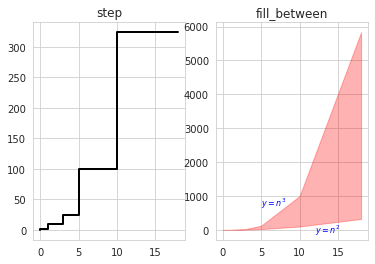

In [136]:
n = np.array([0,1,3,5,10,18])

fig, ax = plt.subplots(1, 2)
ax[0].step(n, n**2, lw=2, color = 'black')
ax[0].set_title("step")
ax[1].fill_between(n, n**2, n**3, color="red", alpha=0.3);
ax[1].set_title("fill_between")
ax[1].text(5, 700, r"$y=n^3$", fontsize=8, color="blue")
ax[1].text(12, -100, r"$y=n^2$", fontsize=8, color="blue");

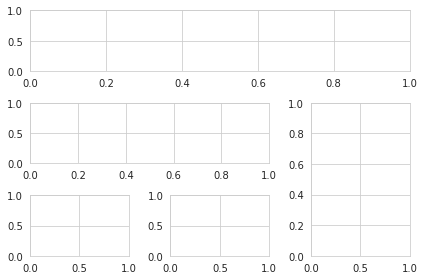

In [137]:
fig = plt.figure()
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))
fig.tight_layout()